Import required packages:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from subprocess import call
from IPython.display import Image
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display
from sklearn import tree
%matplotlib inline

Load data:

In [2]:
data = pd.read_fwf("auto-mpg.data", header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


Add column names to the dataframe:

In [3]:
col_names = ['MPG', 'cylinders','displacement',
             'horsepower', 'weight', 'acceleration', 
             'model year', 'origin', 'car name']
data.columns = col_names
data.head()

,MPG,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


Remove missing data:

In [4]:
data = data.replace('?', np.NaN).dropna()

Consider the first 20 rows as training data:

In [5]:
X = data.drop(columns=['MPG', 'cylinders', 'model year', 'origin', 'car name'])
feature_names = ['displacement','horsepower','weight','acceleration']
Y = data['MPG']
X_train = X.iloc[0:20,]
y_train = Y[0:20]

Visualize MPG vs displacement:

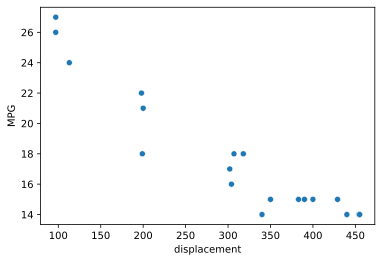

In [6]:
d = {'displacement': X_train["displacement"], 'MPG': y_train}
df = pd.DataFrame.from_dict(d)
sns.scatterplot(data=df, x="displacement", y="MPG")
%config InlineBackend.figure_formats = ['svg']

Calculate average MPG for samples in R1 (displacement<=250):

In [7]:
np.mean(df[df['displacement']<=250]['MPG'])

23.0

Calculate average MPG for samples in R2 (displacement>250):

In [8]:
np.mean(df[df['displacement']>250]['MPG'])

15.285714285714286

Find SSE for different thresholds:

In [9]:
mydict = {}
for t in range(100,500,50):
    R1 = df[df['displacement']<=t]
    c1 = np.mean(R1['MPG'])
    R2 = df[df['displacement']>t]
    c2 = np.mean(R2['MPG'])
    RSS = sum((R1['MPG']-c1)**2) + sum((R2['MPG']-c2)**2)
    mydict[t] = RSS
mydict

{100: 156.77777777777777,
 150: 103.13725490196077,
 200: 82.85714285714285,
 250: 82.85714285714285,
 300: 82.85714285714285,
 350: 204.66666666666669,
 400: 255.73333333333335,
 450: 287.05882352941177}

Generate decision tree with max_depth=3 using all the samples and the features:

In [10]:
X_train = X
y_train = Y

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=3,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
tr = dt.fit(X_train, y_train)

Plot the decision tree

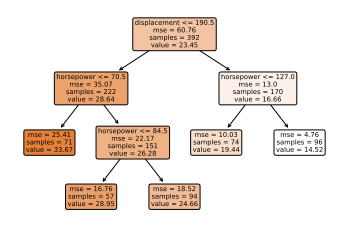

In [11]:
tree.plot_tree(dt, feature_names = feature_names,
                rounded = True, proportion = False, 
                label='all',
                precision = 2, filled = True)

%config InlineBackend.figure_formats = ['svg']

In [12]:
@widgets.interact_manual(tree_depth=(1,3))

def plot_tree(tree_depth=1):

    # Instantiate dt
    dt = DecisionTreeRegressor(max_depth=tree_depth,
                 min_samples_leaf=0.13,
                random_state=3)

    # Fit dt to the training set
    tr = dt.fit(X_train, y_train)

    # Visualize the tree
    from IPython.display import display
    display(tree.plot_tree(dt, feature_names = feature_names,
                rounded = True, proportion = False, 
                label='all',
                precision = 2, filled = True))

interactive(children=(IntSlider(value=1, description='tree_depth', max=3, min=1), Button(description='Run Inte…